In [147]:

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , confusion_matrix
import warnings
from sklearn.exceptions import DataConversionWarning
import joblib
#filter warnings
warnings.filterwarnings(action='ignore', category=UserWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Loading the test dataset
test_data = pd.read_csv('student_data.csv')


In [148]:
test_data.head()

,Student ID,Gender,Age,Major,GPA,Extra Curricular,Num Programming Languages,Num Past Internships,Good Candidate
0,0,F,21,Statistics and Machine Learning,2.83,Sorority,4,1,0
1,1,M,20,Information Systems,2.89,Fraternity,5,3,0
2,2,F,20,Math,2.66,Teaching Assistant,3,1,0
3,3,M,20,Information Systems,2.48,Fraternity,5,0,0
4,4,F,21,Statistics and Machine Learning,3.30,Sorority,2,1,0


In [149]:
test_data.describe()

,Student ID,Age,GPA,Num Programming Languages,Num Past Internships,Good Candidate
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,249.500000,20.944000,2.905780,3.04600,2.052000,0.474000
std,144.481833,1.455025,0.839559,1.36073,1.407572,0.499824
min,0.000000,18.000000,0.000000,1.00000,0.000000,0.000000
25%,124.750000,20.000000,2.345000,2.00000,1.000000,0.000000
50%,249.500000,21.000000,2.990000,3.00000,2.000000,0.000000
75%,374.250000,22.000000,3.560000,4.00000,3.000000,1.000000
max,499.000000,25.000000,4.000000,5.00000,4.000000,1.000000


In [150]:
#Loading the pickle model
model =joblib.load('model.pkl')


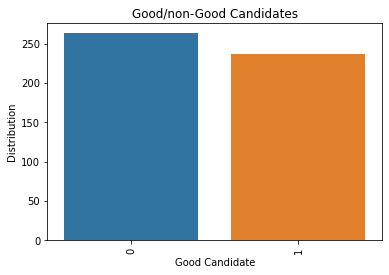

In [38]:
#Plotting the distribution of the test dataset (Good Candidate)
plt.title('Good/non-Good Candidates')
sns.countplot(x='Good Candidate', data=test_data)
plt.ylabel('Distribution')
plt.xticks(rotation=90) 
plt.show()

In [45]:
print(test_data.columns)


Index(['Age', 'Major', 'GPA', 'Extra Curricular', 'Num Programming Languages',
       'Num Past Internships', 'Good Candidate'],
      dtype='object')


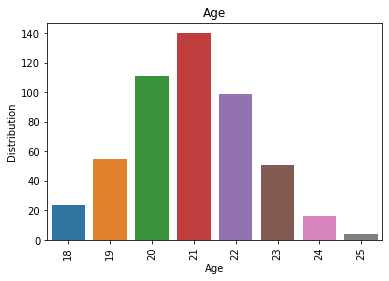

In [12]:
#Plotting the distribution of the test dataset (Age)
plt.title('Age')
sns.countplot(x='Age', data=test_data)
plt.ylabel('Distribution')
plt.xticks(rotation=90) 
plt.show()

ValueError: Could not interpret input 'Gender'

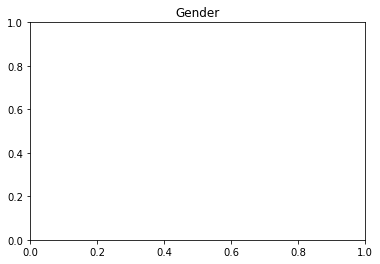

In [176]:
#Plotting the distribution of the test dataset (Gender)
plt.title('Gender')
sns.countplot(x='Gender', data=test_data)
plt.ylabel('Distribution')
plt.xticks(rotation=90) 
plt.show()

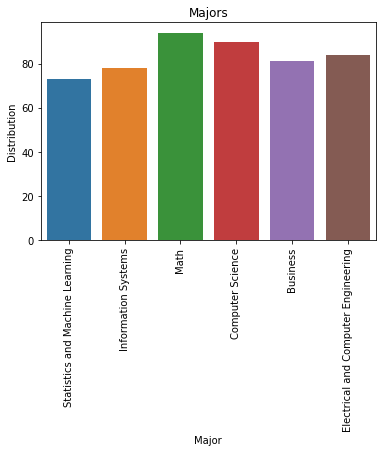

In [14]:
#Plotting the distribution of the test dataset (Majors)
plt.title('Majors')
sns.countplot(x='Major', data=test_data)
plt.ylabel('Distribution')
plt.xticks(rotation=90) 
plt.show()

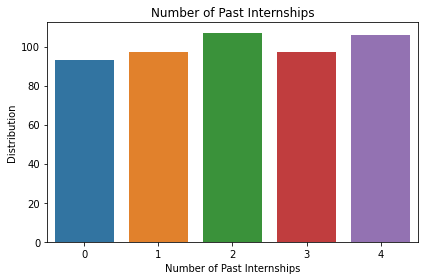

In [15]:
#Plotting the distribution of the test dataset (Number of Past Internships)
plt.title('Number of Past Internships')
sns.countplot(x='Num Past Internships', data=test_data )
plt.ylabel('Distribution')
plt.xlabel('Number of Past Internships')
plt.tight_layout()
plt.show()



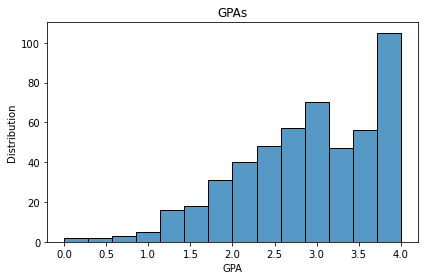

In [16]:
#Plotting the distribution of the test dataset (GPAs)
plt.title('GPAs')
sns.histplot(test_data['GPA'])
plt.xlabel('GPA')
plt.ylabel('Distribution')
plt.tight_layout()
plt.show()

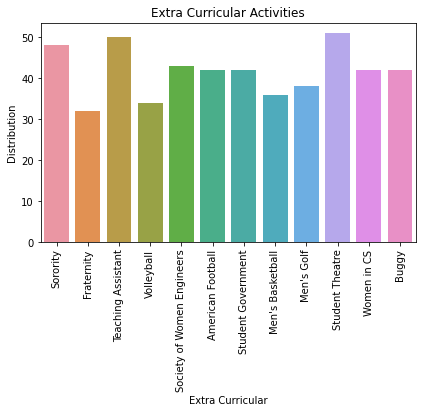

In [17]:
#Plotting the distribution of the test dataset (Extra Curricular Activities)
plt.title('Extra Curricular Activities')
sns.countplot(x='Extra Curricular', data=test_data )
plt.ylabel('Distribution')
plt.tight_layout()
plt.xticks(rotation=90) 
plt.show()

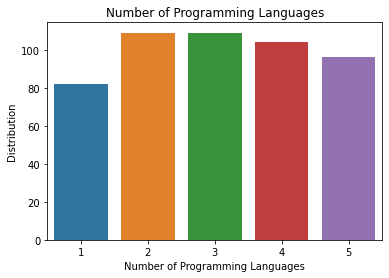

In [141]:
#Plotting the distribution of the test dataset (Number of Programming Languages)
plt.title('Number of Programming Languages')
sns.countplot(x='Num Programming Languages', data=test_data)
plt.ylabel('Distribution')
plt.xlabel('Number of Programming Languages')
plt.show()


In [174]:
#Eliminating the student id and gender
# test_data =test_data.drop(columns=['Student ID', 'Gender'])

In [19]:
#Predicting
x_test = test_data.drop(columns=['Good Candidate'], axis=1)

prediction =model.predict(x_test)

The accuracy score for this model is: 0.832
Confusion matrix
[[221  42]
 [ 42 195]]
Confusion matrix in percentages
[[33.33333333 16.66666667]
 [16.66666667 33.33333333]]


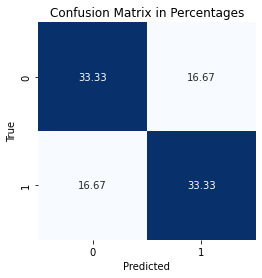

In [51]:
import itertools 



from sklearn.metrics import accuracy_score, confusion_matrix
Y_true= test_data['Good Candidate']
accuracy = accuracy_score(Y_true, prediction)
print("The accuracy score for this model is" + ":", accuracy)





conf_matrix= confusion_matrix(Y_true, prediction)
print('Confusion matrix')
print(conf_matrix)

classes = ["1", "2"]  

# Computing the confusion matrix (Regular numbers)
confusion_matrix = confusion_matrix(Y_true, prediction) 


# Compute the confusion matrix percentage

from sklearn.metrics import confusion_matrix
import numpy as np

Y_true = np.array([0, 1, 1, 0, 1, 0])
predictions = np.array([0, 1, 0, 0, 1, 1])
conf_matrix = confusion_matrix(Y_true, predictions)
conf_matrix_percentage = (conf_matrix / conf_matrix.sum()) * 100


print("Confusion matrix in percentages")
print(conf_matrix_percentage)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_percentage, annot=True, fmt="0.2f", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix in Percentages")
plt.show()


      

The accuracy score for this model is: 0.832
Confusion matrix
[[221  42]
 [ 42 195]]


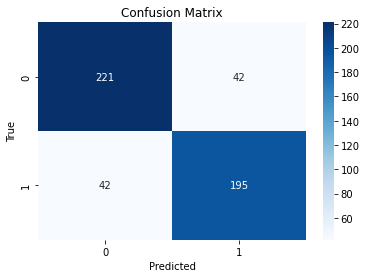

In [56]:
#Performance Evaluation Section

from sklearn.metrics import accuracy_score, confusion_matrix
Y_true= test_data['Good Candidate']
accuracy = accuracy_score(Y_true, prediction)
print("The accuracy score for this model is" + ":", accuracy)

conf_matrix= confusion_matrix(Y_true, prediction)
print('Confusion matrix')
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [153]:
print ("done with Performance Evaluation Section")

done with Performance Evaluation Section


# Starting fairness evaluation seciton

# The Classification Report includes precision, recall, and F1-score. The results show that precision for class 1 and 0 are balanced, and the F1(the mean of the precision and recall) is balanced as well for both classes 1 and 0, thus this classification report suggests a well-performing model that has room for further improvments, this conclusion was reached because of the distribution of false positives and false negatives. 

In [58]:


from sklearn.metrics import classification_report
report = classification_report(Y_true, prediction)
print(report)
      

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       263
           1       0.82      0.82      0.82       237

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



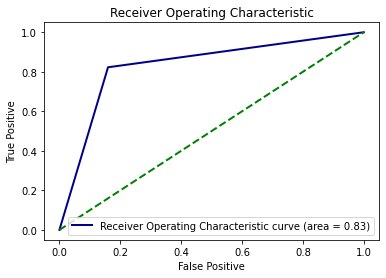

In [92]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
#Receiver Operating Characteristic curve plotting 
fpr, tpr, _ = roc_curve(Y_true, prediction)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'Receiver Operating Characteristic curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

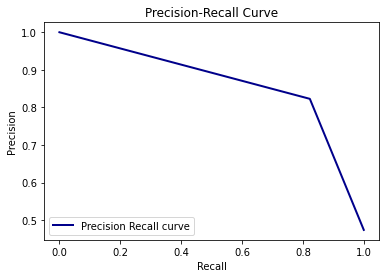

In [90]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_true, prediction)

plt.figure()
plt.plot(recall, precision, color='darkblue', lw=2, label='Precision Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# The True positives comparisons for the features: Gender, Age, Major. (Equality of opportunity)


In [76]:
# True positives for gender
x_test = test_data.drop(columns=['Good Candidate'], axis=1)

prediction = model.predict(x_test)

evaluation_using_gender = test_data.copy()
evaluation_using_gender['Prediction'] = prediction

# Ensure 'Gender' column is present in the DataFrame
evaluation_using_gender['Gender'] = test_data['Gender']

# Calculate true positive by 'Gender'
tpr_gender = evaluation_using_gender[evaluation_using_gender['Good Candidate'] == 1].groupby('Gender')['Prediction'].mean()

print("TP classification by Gender:")
print(tpr_gender)



KeyError: 'Gender'

In [166]:
# True positives for  majors
x_test = test_data.drop(columns=['Good Candidate'], axis=1)
prediction = model.predict(x_test)

# Add the 'Prediction' column to evaluation_using_major
evaluation_using_major = test_data.copy()

evaluation_using_major['Prediction'] = prediction

# Filterring rows where 'Good Candidate' is 1 
tpr_major = evaluation_using_major[evaluation_using_major['Good Candidate'] == 1].groupby('Major')['Prediction'].mean()

print("TP classification by Major:")
print(tpr_major)


TP classification by Major:
Major
Business                               0.875000
Computer Science                       0.837838
Electrical and Computer Engineering    0.775000
Information Systems                    0.756098
Math                                   0.844444
Statistics and Machine Learning        0.852941
Name: Prediction, dtype: float64


In [156]:
# True positives for AGE

evaluation_using_age = test_data.copy()

x_test = test_data.drop(columns=['Good Candidate'], axis=1)
prediction = model.predict(x_test)  

# Add the 'Prediction' column to evaluation_using_age
evaluation_using_age['Prediction'] = prediction

# Filter rows where 'Good Candidate' is 1 
tpr_age = evaluation_using_age[evaluation_using_age['Good Candidate'] == 1].groupby('Age')['Prediction'].mean()

print("TP classification by Age")
print(tpr_age)


TP classification by Age
Age
18    0.818182
19    0.869565
20    0.720000
21    0.892857
22    0.891304
23    0.875000
24    0.666667
25    0.250000
Name: Prediction, dtype: float64


# The Precision Scores for Gender, Age and Major (The predicitve Parity where the precision of groups is compared)

In [169]:
from sklearn.metrics import precision_score

x_test = test_data.drop(columns=['Good Candidate'], axis=1)
prediction = model.predict(x_test) 

# Add the 'Prediction' column to evaluation_using_major
evaluation_using_major = test_data.copy()

evaluation_using_major['Prediction'] = prediction

# Calculate precision by 'Major'
precision_major = evaluation_using_major.groupby('Major').apply(
    lambda x: precision_score(x['Good Candidate'], x['Prediction'], zero_division=0)
)

print("Precision by Major:")
print(precision_major)


Precision by Major:
Major
Business                               0.897436
Computer Science                       0.775000
Electrical and Computer Engineering    0.861111
Information Systems                    0.794872
Math                                   0.844444
Statistics and Machine Learning        0.763158
dtype: float64


In [172]:

from sklearn.metrics import precision_score

x_test = test_data.drop(columns=['Good Candidate'], axis=1)
prediction = model.predict(x_test) 

# Add the 'Prediction' column
evaluation_using_gender = test_data.copy()

evaluation_using_gender['Prediction'] = prediction

# Calculate precision by 'Major'
precision_gender = evaluation_using_gender.groupby('Gender').apply(
    lambda x: precision_score(x['Good Candidate'], x['Prediction'], zero_division=0)
)

print("Precision by Gender:")
print(precision_gender)


KeyError: 'Gender'

In [159]:
from sklearn.metrics import precision_score

x_test = test_data.drop(columns=['Good Candidate'], axis=1)
prediction = model.predict(x_test)  

# Add the 'Prediction' column to evaluation_using_age
evaluation_using_age['Prediction'] = prediction

# Calculate precision by 'Age'
precision_age = evaluation_using_age.groupby('Age').apply(
    lambda x: precision_score(x['Good Candidate'], x['Prediction'], zero_division=0)
)

print("Precision for Age:")
print(precision_age)


Precision for Age:
Age
18    0.900000
19    0.909091
20    0.782609
21    0.833333
22    0.732143
23    0.875000
24    1.000000
25    1.000000
dtype: float64


In [160]:
from sklearn.metrics import precision_score

x_test = test_data.drop(columns=['Good Candidate'], axis=1)

prediction = model.predict(x_test)  

# Add the 'Prediction' column to evaluation_using_major
evaluation_using_age['Prediction'] = prediction
precision_major = evaluation_using_major.groupby('Major').apply(
    lambda x: precision_score(x['Good Candidate'], x['Prediction'], zero_division=0)
)

print("Precision for Major:")
print(precision_major)

Precision for Major:
Major
Business                               0.897436
Computer Science                       0.775000
Electrical and Computer Engineering    0.861111
Information Systems                    0.794872
Math                                   0.844444
Statistics and Machine Learning        0.763158
dtype: float64


# First Fairness evaluation Startegy/Metric: Group Unaware --> This metric evaluates if the model is feature-agnostic with regard to groups. This is essential to make sure biases based on these characteristics are not reinforced or amplified by the model.

In [173]:
age_checking = 'Age' in x_test.columns
group_unaware_status_age = "Group Unaware" if not age_checking else "Group Aware"
print("The model is " + group_unaware_status_age + " for Age attribute.")


The model is Group Aware for Age attribute.


In [162]:
major_checking = 'Major' in x_test.columns
group_unaware_status_major = "Group Unaware" if not major_checking else "Group Aware"
print("The model is " + group_unaware_status_major + " for Major attribute.")

The model is Group Aware for Major attribute.


In [163]:
gender_checking = 'Gender' in x_test.columns
group_unaware_status = "Group Unaware" if not gender_checking else "Group Aware"
print("The model is " + group_unaware_status_major + " for Gender attribute.")

The model is Group Aware for Gender attribute.


#  Demographic Parity measures how evenly a model's favorable predictions are dispersed among various demographic groupings. It aims for comparable success rates for all groups, irrespective of variables like age or gender. By measuring this, the metric makes sure that the model does not behave biasedly in favor of or against any certain demographic segment. Reaching Demographic Parity promotes inclusivity and equal treatment. For a thorough review, fairness indicators must be balanced with the overall performance of the model.

In [135]:
#2nd : Demographic Parity 

def demographic_parity(data, feature):

    selection_feature = data.groupby(feature)['Good Candidate'].mean()

    # Check  demographic parity
    demographic_parity = selection_feature / selection_feature.mean()

    print(f"Demographic Parity for {feature}:")
    print(demographic_parity)

In [136]:
demographic_parity(test_data, 'Gender')

KeyError: 'Gender'

In [137]:
demographic_parity(test_data, 'Age')

Demographic Parity for Age:
Age
18    0.770865
19    0.703334
20    0.757607
21    0.672755
22    0.781483
23    1.055301
24    1.576769
25    1.681887
Name: Good Candidate, dtype: float64


In [138]:
demographic_parity(test_data, 'Major')

Demographic Parity for Major:
Major
Business                               1.039182
Computer Science                       0.865119
Electrical and Computer Engineering    1.002068
Information Systems                    1.106129
Math                                   1.007398
Statistics and Machine Learning        0.980105
Name: Good Candidate, dtype: float64


#  The fairness evaluation's equality odds quantify the distribution of real positive rates among the various demographic categories. By taking into account both true positives and false positives, it seeks to guarantee fairly accurate predictions for various subgroups. The metric is designed to address any differences in model performance by focusing on equalizing the probability of good predictions. Aiming for Equality Odds reduces disparities in expected outcomes between different groups, which advances justice. It should be taken into account for a thorough evaluation of fairness together with the model's overall performance.

In [ ]:
#equality odds

In [132]:
def equality_odds(data, target_variable, sensitive_feature, predicted_prob_column):

    data['Prediction'] = prediction

    # Calculate true positive rates
    tpr_by_group = data[data[target_variable] == 1].groupby(sensitive_feature)['Prediction'].mean()

    # Print true positive rates
    print(f"\nTrue Positive Rates by {sensitive_feature}:")
    print(tpr_by_group)

    # Calculate false positive rates
    fpr_by_group = data[data[target_variable] == 0].groupby(sensitive_feature)['Prediction'].mean()

    # Print false positive rates
    print(f"\nFalse Positive Rates by {sensitive_feature}:")
    print(fpr_by_group)

In [133]:
equality_odds(test_data, 'Good Candidate', 'Age', 'Prediction')


True Positive Rates by Age:
Age
18    0.818182
19    0.869565
20    0.720000
21    0.892857
22    0.891304
23    0.875000
24    0.666667
25    0.250000
Name: Prediction, dtype: float64

False Positive Rates by Age:
Age
18    0.076923
19    0.062500
20    0.163934
21    0.119048
22    0.283019
23    0.210526
24    0.000000
Name: Prediction, dtype: float64


In [130]:
equality_odds(test_data, 'Good Candidate', 'Major', 'Prediction')


True Positive Rates by Major:
Major
Business                               0.875000
Computer Science                       0.837838
Electrical and Computer Engineering    0.775000
Information Systems                    0.756098
Math                                   0.844444
Statistics and Machine Learning        0.852941
Name: Prediction, dtype: float64

False Positive Rates by Major:
Major
Business                               0.097561
Computer Science                       0.169811
Electrical and Computer Engineering    0.113636
Information Systems                    0.216216
Math                                   0.142857
Statistics and Machine Learning        0.230769
Name: Prediction, dtype: float64


In [127]:
equality_odds(test_data, 'Good Candidate', 'Gender', 'Prediction')

KeyError: 'Gender'